In [3]:
from glob import glob
import pandas as pd
import numpy as np

In [2]:
files1 = glob('training_setA/*')
files2 = glob('training_setB/*')
files = files1+files2

In [3]:
len(files)

40336

In [5]:
aggr = []

for file in files:

    patient = file.split('/')[1].split('.')[0]
    # print(patient)
    data = pd.read_csv(file,sep = '|')
    # getting demographic data
    Age = data.loc[0,'Age']
    if data.loc[0,'Gender']==0:
        Gender = 'Female'
    else:
        Gender = 'Male'

    # getting other constant info
    ## Assuming these fields don't change for a patient
    ## type of ICU
    MICU = data.loc[0,'Unit1']
    SICU = data.loc[0,'Unit2']
    ## Hospital Admission Time
    HospAdmTime = data.loc[0,'HospAdmTime']
    ## Hours in ICU
    ICULOS = data.iloc[-1,39]        #We can also use length of data

    # Whether or not the patient ever had Sepsis during ICU stay
    Sepsis = int(any(data['SepsisLabel']==1))

    # Feature Engineering: 

    if Sepsis == 1: 
        Sepsis_Hour_Index = data['SepsisLabel'].idxmax()
        Sepsis_Hour = data.iloc[Sepsis_Hour_Index, 39]
        if Sepsis_Hour_Index == 0:
            Patient_Type = "Came In With Sepsis"
        else: 
            Patient_Type = "Developed Sepsis During ICU Stay"


    else:
        # if patient did not have Sepsis, set Hour to -1
        Sepsis_Hour = -1
        Patient_Type = 'No Sepsis'

    aggr.append([patient, Age, Gender, MICU, SICU, HospAdmTime, ICULOS, Sepsis, Sepsis_Hour, Patient_Type])

In [6]:
col_names = ["Patient_ID", "Age", "Gender", "MICU", "SICU", "HospAdmTime", "ICULOS", "Sepsis", "Sepsis_Hour", "Patient_Type"]

In [7]:
aggr = pd.DataFrame(aggr, columns = col_names).copy()

In [8]:
aggr.head()

,Patient_ID,Age,Gender,MICU,SICU,HospAdmTime,ICULOS,Sepsis,Sepsis_Hour,Patient_Type
0,p016161,47.20,Male,NaN,NaN,-0.01,10,1,3,Came In With Sepsis
1,p019252,80.34,Female,0.0,1.0,-2.97,24,0,-1,No Sepsis
2,p006372,84.22,Female,1.0,0.0,-0.03,48,0,-1,No Sepsis
3,p009041,76.93,Male,0.0,1.0,-1.69,40,0,-1,No Sepsis
4,p010510,56.10,Male,0.0,1.0,-767.78,49,0,-1,No Sepsis


In [17]:
# export datasets
aggr.to_csv(r'aggregated_full_df_for_viz.csv', index=False)

In [4]:
# import the same dataset
df = pd.read_csv("aggregated_full_df_for_viz.csv")

In [5]:
df.shape

(40336, 10)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from string import ascii_letters

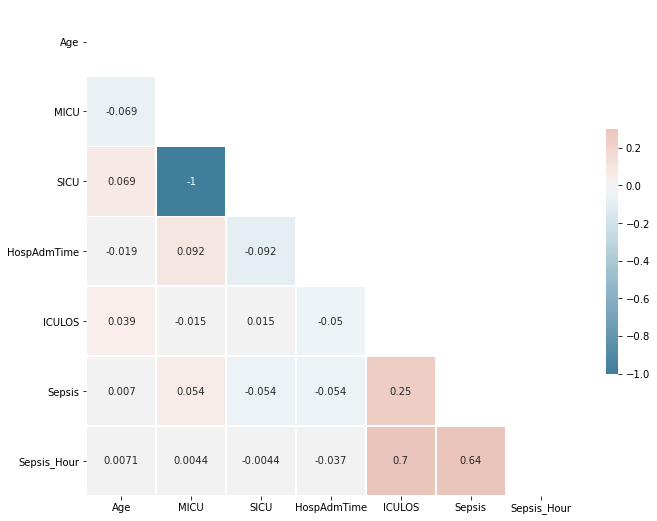

In [7]:
# sns.set_theme(style="white")


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)